In [34]:
# imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pylab

# this allows plots to appear directly in the notebook
%matplotlib inline
# increase size of plots
pylab.rcParams['figure.figsize'] = (15, 10)
# allow reading of all of the columns in a dataset
pd.options.display.max_columns = 50
pd.options.display.max_rows = 60

In [15]:
weatherDF = pd.read_csv("../data/fanduel_data/nflsavant_data_sets/weather_20131231.csv")
weatherDF.head()

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date
0,196009230ram,Los Angeles Rams,21,St. Louis Cardinals,43,66,NaN,78%,8,66 degrees- relative humidity 78%- wind 8 mph,9/23/1960
1,196009240dal,Dallas Cowboys,28,Pittsburgh Steelers,35,72,NaN,80%,16,72 degrees- relative humidity 80%- wind 16 mph,9/24/1960
2,196009250gnb,Green Bay Packers,14,Chicago Bears,17,60,NaN,76%,13,60 degrees- relative humidity 76%- wind 13 mph,9/25/1960
3,196009250sfo,San Francisco 49ers,19,New York Giants,21,72,NaN,44%,10,72 degrees- relative humidity 44%- wind 10 mph,9/25/1960
4,196009250clt,Baltimore Colts,20,Washington Redskins,0,62,NaN,80%,9,62 degrees- relative humidity 80%- wind 9 mph,9/25/1960


##Functions that create new columns

In [16]:
'''
iterates through every row to check who the winner is 
and inputs that in a new column named 'winner'
'''
def create_winner(row):
    if (row[['home_score']]  > row[['away_score']]).all():
        return row['home_team']
    else:
        return row['away_team']

    
'''
iterates through a df and checks is the home team won or 
not
'''
def is_home_team_winner(row):
    if (row[['home_team']] == row[['winner']]).all():
        return True
    else:
        return False
    

from datetime import datetime
'''
creates a month column
returns the month to the dataframe
'''
def create_month_column(row):
    return month_generator(row['date'])

    
'''converts data of format mm/dd/yyyy into 
english words. returns the name of the month
'''
def month_generator(dateStr):
    date_object = datetime.strptime(dateStr, '%m/%d/%Y')
    dateInEnglish = date_object.strftime('%B %d, %Y')
    month = dateInEnglish.split(' ', 1)[0]
    return month


'''
searches the weather column value at respected row and searches for keyword 'rain'
gets row with info
returns T/F depending if raining or not
'''
def create_raining_column(row):
    return weatherDF['weather'].str.contains('rain', na = False)

##Manipulate data and create new columns
add columns 'winner and 'winner_is_home_team'

In [17]:
# weatherDF['winner'] = weatherDF.apply(create_winner, axis=1)
weatherDF['winner_is_home_team'] = weatherDF.apply(is_home_team_winner, axis=1)

# create month column1
weatherDF['month'] = weatherDF.apply(create_month_column, axis=1)

# create isRaining column
# weatherDF['did_rain'] = weatherDF['weather'].str.contains('rain', na = False)

There is not enough information to conduct on August

In [18]:
weatherDF = weatherDF[weatherDF['month'] != 'August']

##Now check to see if the weather affects home team win percentage. Also check if weather affects points scored in a game.

Start by checking all unique values in home team columns to research normal temperatures in that home team city.

Notes on this section:

http://www.sportingcharts.com/articles/nfl/a-historical-analysis-of-nfl-results-during-cold-weather-months.aspx
results from this page only go until 1978

Checking to see which values appear the most to choose a dataset with most records

In [19]:
weatherDF['home_team'].value_counts().idxmax()

'Pittsburgh Steelers'

In [35]:
weatherDF[weatherDF['temperature'] <= 10]

,id,home_team,home_score,away_team,away_score,temperature,wind_chill,humidity,wind_mph,weather,date,winner_is_home_team,month
369,196312150crd,St. Louis Cardinals,24,Dallas Cowboys,28,6,-9,65%,11,6 degrees- relative humidity 65%- wind 11 mph-...,12/15/1963,False,December
370,196312150chi,Chicago Bears,24,Detroit Lions,14,1,-15,74%,11,1 degrees- relative humidity 74%- wind 11 mph-...,12/15/1963,False,December
375,196312290chi,Chicago Bears,14,New York Giants,10,4,-11,60%,11,4 degrees- relative humidity 60%- wind 11 mph-...,12/29/1963,False,December
457,196411290min,Minnesota Vikings,34,Los Angeles Rams,13,2,-16,68%,14,2 degrees- relative humidity 68%- wind 14 mph-...,11/29/1964,False,November
756,196711190cle,Cleveland Browns,14,Minnesota Vikings,10,0,0,0%,NaN,0 degrees- relative humidity 0%- no wind- wind...,11/19/1967,False,November
796,196712310gnb,Green Bay Packers,21,Dallas Cowboys,17,-2,NaN,55%,15,-2 degrees- relative humidity 55%- wind 15 mph...,12/31/1967,False,December
1026,196912270min,Minnesota Vikings,23,Los Angeles Rams,20,10,-1,83%,7,10 degrees- relative humidity 83%- wind 7 mph-...,12/27/1969,False,December
1028,197001040min,Minnesota Vikings,27,Cleveland Browns,7,8,-6,75%,9,8 degrees- relative humidity 75%- wind 9 mph- ...,1/4/1970,False,January
1215,197012270min,Minnesota Vikings,14,San Francisco 49ers,17,10,-5,61%,13,10 degrees- relative humidity 61%- wind 13 mph...,12/27/1970,False,December
1551,197212030min,Minnesota Vikings,23,Chicago Bears,10,2,-15,50%,12,2 degrees- relative humidity 50%- wind 12 mph-...,12/3/1972,False,December


In [20]:
#All home team unique cities
teams = pd.unique(weatherDF.home_team.ravel())
teams

array(['Los Angeles Rams', 'Dallas Cowboys', 'Green Bay Packers',
       'San Francisco 49ers', 'Baltimore Colts', 'Philadelphia Eagles',
       'Cleveland Browns', 'St. Louis Cardinals', 'Detroit Lions',
       'Pittsburgh Steelers', 'Washington Redskins', 'Chicago Bears',
       'New York Giants', 'Minnesota Vikings', 'Atlanta Falcons',
       'New Orleans Saints', 'Kansas City Chiefs', 'Buffalo Bills',
       'San Diego Chargers', 'Cincinnati Bengals', 'Boston Patriots',
       'Denver Broncos', 'Houston Oilers', 'Miami Dolphins',
       'New York Jets', 'Oakland Raiders', 'New England Patriots',
       'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Los Angeles Raiders',
       'Indianapolis Colts', 'Phoenix Cardinals', 'Arizona Cardinals',
       'Jacksonville Jaguars', 'St. Louis Rams', 'Carolina Panthers',
       'Baltimore Ravens', 'Tennessee Oilers', 'Tennessee Titans',
       'Houston Texans'], dtype=object)

In [21]:
steelers = weatherDF[weatherDF['home_team'] == 'Pittsburgh Steelers']

##Check average temperatures  

In [46]:
#weatherDF['month'] = weatherDF.apply(create_month_column, axis=1)
#pd.unique(weatherDF.home_team.ravel())
team_series = pd.Series(teams)
team_series

0         Los Angeles Rams
1           Dallas Cowboys
2        Green Bay Packers
3      San Francisco 49ers
4          Baltimore Colts
5      Philadelphia Eagles
6         Cleveland Browns
7      St. Louis Cardinals
8            Detroit Lions
9      Pittsburgh Steelers
10     Washington Redskins
11           Chicago Bears
12         New York Giants
13       Minnesota Vikings
14         Atlanta Falcons
15      New Orleans Saints
16      Kansas City Chiefs
17           Buffalo Bills
18      San Diego Chargers
19      Cincinnati Bengals
20         Boston Patriots
21          Denver Broncos
22          Houston Oilers
23          Miami Dolphins
24           New York Jets
25         Oakland Raiders
26    New England Patriots
27        Seattle Seahawks
28    Tampa Bay Buccaneers
29     Los Angeles Raiders
30      Indianapolis Colts
31       Phoenix Cardinals
32       Arizona Cardinals
33    Jacksonville Jaguars
34          St. Louis Rams
35       Carolina Panthers
36        Baltimore Ravens
3

In [80]:
teamsDF = weatherDF.groupby('home_team').agg(['mean','max','min'])
#teamsHomeScore = teamsDF['home_score']
#teamsHomeScore
teamsDF

home_score         away_score         temperature      \
                           mean max min       mean max min        mean max   
home_team                                                                    
Arizona Cardinals     20.758621  51   0  21.737931  45   3   66.717241  92   
Atlanta Falcons       20.617143  51   0  21.628571  57   0   61.854286  82   
Baltimore Colts       22.625000  58   0  19.914773  57   0   51.272727  84   
Baltimore Ravens      23.863946  55   0  16.857143  46   0   51.374150  79   
Boston Patriots       13.142857  27   0  24.428571  45  14   51.000000  69   
Buffalo Bills         21.116809  52   0  19.273504  56   0   47.692308  80   
Carolina Panthers     20.688312  52   0  19.253247  41   0   56.746753  89   
Chicago Bears         20.633803  61   0  18.011737  46   0   46.225352  82   
Cincinnati Bengals    22.716332  61   0  20.527221  49   0   49.782235  81   
Cleveland Browns      20.226804  51   0  19.384021  51   0   47.922680  81   
Dallas Cowboys        24.541371  59   0  18.716312  51   0   59.460993  96   
Denver Broncos        24.645429  52   3  19.022161  59   0   46.385042  91   
Detroit Lions         21.158031  55   0  19.595855  55   0   64.937824  76   
Green Bay Packers     23.308585  56   0  17.524362  48   0   43.380510  76   
Houston Oilers        20.866029  58   0  19.526316  61   0   72.000000  72   
Houston Texans        22.164948  43   3  22.154639  45   0   71.030928  89   
Indianapolis Colts    22.557769  55   0  20.239044  50   0   69.067729  88   
Jacksonville Jaguars  21.619048  62   0  18.993197  47   0   66.340136  90   
Kansas City Chiefs    22.130058  56   0  18.580925  54   0   50.260116  86   
Los Angeles Raiders   21.824074  42   3  17.833333  45   0   62.379630  85   
Los Angeles Rams      22.762264  59   0  19.071698  52   0   62.241509  85   
Miami Dolphins        23.076923  52   0  17.714286  49   0   75.065934  89   
Minnesota Vikings     23.267990  54   0  19.017370  56   0   59.317618  79   
New England Patriots  22.994030  59   0  18.388060  44   0   49.298507  82   
New Orleans Saints    21.072022  62   0  21.238227  62   0   70.861496  86   
New York Giants       21.284360  62   0  19.741706  52   0   51.407583  81   
New York Jets         20.737463  62   0  19.964602  49   0   52.286136  88   
Oakland Raiders       23.023904  52   0  20.310757  56   0   56.948207  79   
Philadelphia Eagles   20.862471  58   0  19.188811  49   0   51.305361  83   
Phoenix Cardinals     17.916667  38   0  19.729167  38   0   68.687500  92   
Pittsburgh Steelers   22.764840  52   0  17.036530  51   0   46.833333  79   
San Diego Chargers    22.698006  54   0  20.276353  49   0   63.458689  86   
San Francisco 49ers   23.506912  56   0  18.527650  48   0   56.110599  80   
Seattle Seahawks      23.062069  58   0  19.400000  51   0   63.889655  72   
St. Louis Cardinals   21.815000  52   3  21.530000  55   0   50.450000  84   
St. Louis Rams        24.300752  59   3  22.721805  45   0   67.180451  73   
Tampa Bay Buccaneers  18.820598  48   0  19.561462  49   0   70.940199  93   
Tennessee Oilers      20.000000  44   3  17.866667  36   6   57.933333  81   
Tennessee Titans      23.224000  47   6  20.976000  51   0   56.064000  87   
Washington Redskins   21.898104  72   0  19.445498  59   0   53.154028  87   

                         wind_chill           wind_mph          \
                     min       mean max min       mean max min   
home_team                                                        
Arizona Cardinals      0   0.000000   0   0   7.165049  19   3   
Atlanta Falcons        0  15.423077  30   0  10.290816  19   4   
Baltimore Colts       18  23.275862  30   6  10.034091  24   4   
Baltimore Ravens      24  19.000000  30   0   6.869863  26   1   
Boston Patriots       25  12.000000  12  12  15.571429  22   8   
Buffalo Bills          0  19.711340  30 -14  11.569364  32   1   
Carolina Panthers     24  11.933333  30   0   6.815789  18   1   
Chicag

In [107]:
teamsPointsAgainst = teamsDF['away_score']
teamsPointsAgainst.columns = ['mean_points_against','max_points_against','min_points_against']
teamsPointsAgainst['team'] = teamsPointsAgainst.index
teamsPointsAgainst = teamsPointsAgainst.reset_index(drop=True)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [108]:
teamsTemperature = teamsDF['temperature']
teamsTemperature.columns = ['mean_temperature','max_temperature','min_temperature']
teamsTemperature['team'] = teamsTemperature.index
teamsTemperature = teamsTemperature.reset_index(drop=True)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [123]:
pointsVStemperature = teamsPointsAgainst.merge(teamsTemperature)
pointsVStemperature = pointsVStemperature.sort(['min_temperature'])

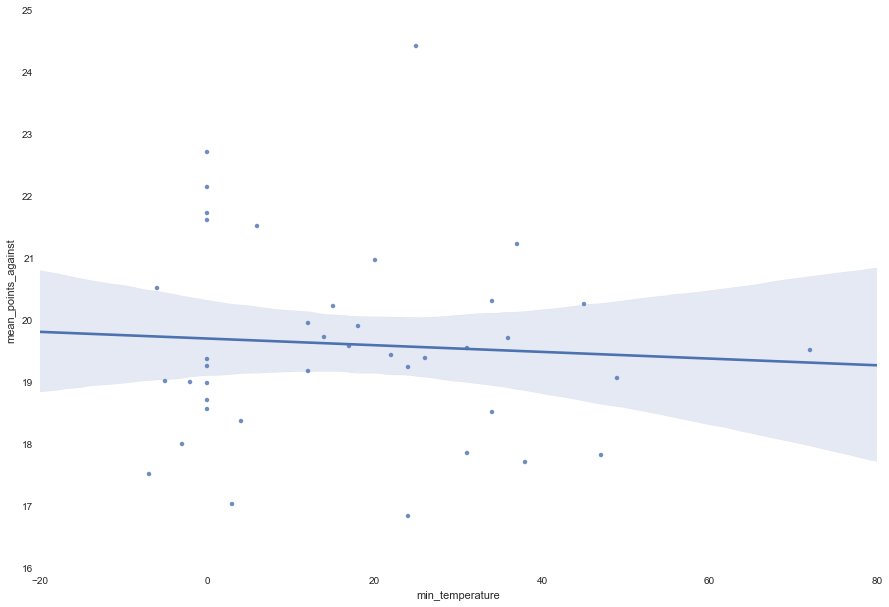

In [125]:
sns.regplot(x='min_temperature',y='mean_points_against',data=pointsVStemperature)